In this notebook, I want to compute the uncertainty of the phonon dispersion curves from the bootstrap ensembles.

In [1]:
from pathlib import Path
from datetime import datetime
from tqdm import tqdm
import sys

from ase import Atoms
from ase.calculators.kim import KIM
from ase.phonons import Phonons
from ase.visualize import view

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("default")

WORK_DIR = Path().absolute()
sys.path.append(str(WORK_DIR.parent))

In [2]:
from energyvslatconst.energyvslatconst import energyvslatconst
from energyvslatconst.relaxation_latconst import equilibrate_graphene

In [3]:
# Read setting file
ROOT_DIR = WORK_DIR.parent
with open(ROOT_DIR / "settings.json", "r") as f:
    settings = json.load(f)
partition = settings["partition"]
RES_DIR = WORK_DIR / "results" / f"{partition}_partition"
if not RES_DIR.exists():
    RES_DIR.mkdir(parents=True)

In [4]:
# Equilibrium lattice constant
potential = "DUNN_best_train"
ainit = 2.466
a0, e0 = equilibrate_graphene(potential, ainit)
print("Equilibrium lattice constant:", a0)

Equilibrium lattice constant: 2.4567717656250005


In [5]:
# Graphene sheet
cell = a0 * np.array([[1, 0, 0], [0.5, np.sqrt(3) / 2, 0], [0, 0, 10]])
positions = np.array([cell[0], 1 / 3 * cell[0] + 1 / 3 * cell[1]])
atoms = Atoms("2C", positions=positions, cell=cell, pbc=[1, 1, 1])
# view(atoms.repeat((4, 4, 1)))

In [6]:
energies = np.empty((0, 100, 6))
for ii in tqdm(range(100)):
    sample_dir = RES_DIR / f"{ii:03d}"
    modelname = f"DUNN_C_randinit_{ii:03d}"

    # Phonon calculator
    calc = KIM(modelname)
    ph = Phonons(
        atoms, calc, supercell=(8, 8, 1), delta=0.01, name=sample_dir / "phonon"
    )
    ph.run()

    # Read forces and assemble the dynamical matrix
    ph.read(acoustic=True)
    # ph.clean()

    path = atoms.cell.bandpath("GMKG", npoints=100)
    bs = ph.get_band_structure(path)
    energies = np.concatenate((energies, bs.energies), axis=0)

  0%|                                                                         | 0/100 [00:00<?, ?it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.996e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.105e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 9.346e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.155e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 9.053e-03*i)


  2%|█▎                                                               | 2/100 [00:00<00:15,  6.52it/s]

WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 9.902e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.147e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.110e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.944e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.996e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.347e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.412e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 2.449e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 2.647e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.351e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.347e-04*i)


  3%|█▉                                                               | 3/100 [00:00<00:13,  7.27it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.427e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 7.857e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.526e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 2.172e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 2.664e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.07,  0.00,  0.00) ; (omega_q = 2.920e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.08,  0.00,  0.00) ; (omega_q = 2.802e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.10,  0.00,  0.00) ; (omega_q = 1.925e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.05, -0.05,  0.00) ; (omega_q = 2.243e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.05, -0.05,  0.00) ; (omega_q = 2.865e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 2.898e-02*i)
WARNING, 1 imaginary frequencies

  7%|████▌                                                            | 7/100 [00:00<00:10,  8.75it/s]

WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.163e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.164e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.959e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.599e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.768e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.699e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.063e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.384e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.363e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 5.987e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.397e-02*i)
WARNING, 1 imaginary frequencies

  9%|█████▊                                                           | 9/100 [00:00<00:09,  9.14it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.327e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.274e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 9.717e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.223e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.056e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.120e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.211e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.466e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 5.107e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.327e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.319e-03*i)
WARNING, 1 imaginary frequencies

 12%|███████▋                                                        | 12/100 [00:01<00:09,  9.72it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.259e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.900e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.106e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.459e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.498e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.07,  0.00,  0.00) ; (omega_q = 6.697e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 9.644e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.520e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.435e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.076e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 5.711e-03*i)
WARNING, 1 imaginary frequencies

 14%|████████▉                                                       | 14/100 [00:01<00:08, 10.11it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.598e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.598e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.965e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.750e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.074e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.403e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.398e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 7.080e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.428e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.382e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.045e-02*i)
WARNING, 1 imaginary frequencies

 18%|███████████▌                                                    | 18/100 [00:01<00:07, 10.78it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.396e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.809e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.090e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.440e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.486e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.07,  0.00,  0.00) ; (omega_q = 7.181e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 9.859e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.506e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.416e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.060e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 5.623e-03*i)
WARNING, 2 imaginary frequencies

 20%|████████████▊                                                   | 20/100 [00:01<00:07, 11.06it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.627e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.627e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.299e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.566e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 8.222e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 9.656e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 4.553e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 6.277e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.673e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.028e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.423e-03*i)
WARNING, 1 imaginary frequencies

 24%|███████████████▎                                                | 24/100 [00:02<00:06, 11.27it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.765e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.511e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 2.491e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 2.710e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.447e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.765e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.798e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.661e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 6.125e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 4.951e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.427e-03*i)
WARNING, 1 imaginary frequencies

 26%|████████████████▋                                               | 26/100 [00:02<00:07, 10.34it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.095e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 6.068e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.144e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.527e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.624e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.07,  0.00,  0.00) ; (omega_q = 1.064e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 1.248e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.635e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.499e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.112e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 5.873e-03*i)
WARNING, 1 imaginary frequencies

 30%|███████████████████▏                                            | 30/100 [00:02<00:06, 10.79it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.038e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.043e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 6.911e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 6.468e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.802e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.787e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.920e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.038e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.102e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.886e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 9.002e-03*i)
WARNING, 1 imaginary frequencies

 32%|████████████████████▍                                           | 32/100 [00:03<00:06, 10.81it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.462e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.737e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.068e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.382e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.332e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 3.603e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.372e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.362e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.039e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 5.554e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.462e-04*i)
WARNING, 1 imaginary frequencies

 34%|█████████████████████▊                                          | 34/100 [00:03<00:05, 11.05it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.295e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.026e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.870e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 6.597e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 6.072e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.413e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.481e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.753e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.026e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.220e-05*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.220e-05*i)


 38%|████████████████████████▎                                       | 38/100 [00:03<00:05, 11.32it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.107e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.545e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.020e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.277e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.074e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.148e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.265e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.935e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 5.370e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.107e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.581e-04*i)
WARNING, 1 imaginary frequencies

 40%|█████████████████████████▌                                      | 40/100 [00:03<00:05, 11.50it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.051e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.051e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.882e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.739e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 8.493e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 9.815e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 2.963e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 5.537e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.861e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.297e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.591e-03*i)
WARNING, 2 imaginary frequencies

 44%|████████████████████████████▏                                   | 44/100 [00:04<00:04, 11.46it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.079e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.079e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.672e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.149e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 9.524e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.212e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.098e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.149e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.198e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.274e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.985e-03*i)
WARNING, 1 imaginary frequencies

 46%|█████████████████████████████▍                                  | 46/100 [00:04<00:04, 11.37it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.144e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.369e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 7.739e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 8.567e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.249e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.677e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.570e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.234e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.144e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.665e-05*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.164e-03*i)
WARNING, 1 imaginary frequencies

 48%|██████████████████████████████▋                                 | 48/100 [00:04<00:04, 11.24it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.863e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 6.787e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.298e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.791e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 2.063e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.07,  0.00,  0.00) ; (omega_q = 1.947e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.08,  0.00,  0.00) ; (omega_q = 7.118e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.05, -0.05,  0.00) ; (omega_q = 1.202e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 2.005e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 2.044e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.750e-02*i)
WARNING, 1 imaginary frequencies

 52%|█████████████████████████████████▎                              | 52/100 [00:04<00:04, 11.17it/s]

WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 9.342e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.517e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.438e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.080e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 5.734e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 6.467e-05*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 6.695e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 6.009e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.131e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.503e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.580e-02*i)
WARNING, 1 imaginary frequencies

 54%|██████████████████████████████████▌                             | 54/100 [00:05<00:04, 10.98it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 9.647e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 8.088e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.573e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 2.245e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 2.768e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.07,  0.00,  0.00) ; (omega_q = 3.064e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.08,  0.00,  0.00) ; (omega_q = 3.009e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.10,  0.00,  0.00) ; (omega_q = 2.299e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.05, -0.05,  0.00) ; (omega_q = 2.553e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.05, -0.05,  0.00) ; (omega_q = 3.056e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 3.034e-02*i)
WARNING, 1 imaginary frequencies

 58%|█████████████████████████████████████                           | 58/100 [00:05<00:03, 11.10it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.728e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.201e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 4.901e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.881e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.109e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.728e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.164e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.611e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 6.236e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 6.168e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.399e-03*i)
WARNING, 1 imaginary frequencies

 60%|██████████████████████████████████████▍                         | 60/100 [00:05<00:04,  9.85it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.735e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.841e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.095e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.444e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.480e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.07,  0.00,  0.00) ; (omega_q = 6.463e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 9.447e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.502e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.420e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.065e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 5.654e-03*i)
WARNING, 2 imaginary frequencies

 64%|████████████████████████████████████████▉                       | 64/100 [00:05<00:03, 10.51it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.542e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 6.558e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.253e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.724e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.975e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.07,  0.00,  0.00) ; (omega_q = 1.832e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.08,  0.00,  0.00) ; (omega_q = 3.073e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.05, -0.05,  0.00) ; (omega_q = 1.008e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 1.896e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.959e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.685e-02*i)
WARNING, 1 imaginary frequencies

 66%|██████████████████████████████████████████▏                     | 66/100 [00:06<00:03, 10.46it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.183e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 7.489e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.440e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 2.010e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 2.373e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.07,  0.00,  0.00) ; (omega_q = 2.394e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.08,  0.00,  0.00) ; (omega_q = 1.714e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.05, -0.05,  0.00) ; (omega_q = 1.946e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 2.422e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 2.340e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.961e-02*i)
WARNING, 1 imaginary frequencies

 70%|████████████████████████████████████████████▊                   | 70/100 [00:06<00:02, 10.87it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.714e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 1.651e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 1.621e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.714e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 9.693e-05*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.182e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 5.034e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 7.457e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 2.586e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.991e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.088e-03*i)
WARNING, 2 imaginary frequencies

 72%|██████████████████████████████████████████████                  | 72/100 [00:06<00:02, 10.98it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.195e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.753e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 6.466e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 6.325e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.580e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.345e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.638e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.195e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.168e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 1.629e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 1.598e-03*i)
WARNING, 1 imaginary frequencies

 76%|████████████████████████████████████████████████▋               | 76/100 [00:07<00:02, 11.08it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 6.428e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.935e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.110e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.455e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.464e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.07,  0.00,  0.00) ; (omega_q = 3.724e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 8.158e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.492e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.432e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.080e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 5.745e-03*i)
WARNING, 2 imaginary frequencies

 78%|█████████████████████████████████████████████████▉              | 78/100 [00:07<00:01, 11.02it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.959e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.872e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 8.795e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.042e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 5.640e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 7.212e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.042e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.586e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.719e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.959e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 8.618e-05*i)
WARNING, 1 imaginary frequencies

 82%|████████████████████████████████████████████████████▍           | 82/100 [00:07<00:01, 11.06it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.949e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.001e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 4.210e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.249e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.917e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.949e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.810e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.030e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 7.117e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 7.788e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.906e-03*i)
WARNING, 1 imaginary frequencies

 84%|█████████████████████████████████████████████████████▊          | 84/100 [00:07<00:01, 10.94it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.898e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 7.043e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.356e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.895e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 2.244e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.07,  0.00,  0.00) ; (omega_q = 2.281e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.08,  0.00,  0.00) ; (omega_q = 1.698e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.05, -0.05,  0.00) ; (omega_q = 1.896e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 2.304e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 2.212e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.848e-02*i)
WARNING, 1 imaginary frequencies

 86%|███████████████████████████████████████████████████████         | 86/100 [00:07<00:01, 11.09it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.835e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.243e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.243e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.611e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.556e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 7.977e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 8.423e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.614e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.813e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.416e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.611e-04*i)


 90%|█████████████████████████████████████████████████████████▌      | 90/100 [00:08<00:00, 11.14it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 6.112e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 6.112e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.831e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 6.465e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.230e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.676e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.879e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.07,  0.00,  0.00) ; (omega_q = 1.617e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 1.711e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.871e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.640e-02*i)
WARNING, 1 imaginary frequencies

 92%|██████████████████████████████████████████████████████████▉     | 92/100 [00:08<00:00,  9.80it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.726e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 7.285e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.398e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.942e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 2.270e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.07,  0.00,  0.00) ; (omega_q = 2.233e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.08,  0.00,  0.00) ; (omega_q = 1.367e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.05, -0.05,  0.00) ; (omega_q = 1.669e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 2.274e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 2.243e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.895e-02*i)
WARNING, 1 imaginary frequencies

 94%|████████████████████████████████████████████████████████████▏   | 94/100 [00:08<00:00,  9.94it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.998e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.893e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.106e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.461e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.508e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.07,  0.00,  0.00) ; (omega_q = 7.327e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 1.003e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.528e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.436e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.075e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 5.704e-03*i)
WARNING, 1 imaginary frequencies

 96%|█████████████████████████████████████████████████████████████▍  | 96/100 [00:08<00:00, 10.19it/s]

WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 1.222e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.654e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.526e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.135e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 6.000e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.889e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.219e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.421e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 5.277e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.798e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.250e-03*i)
WARNING, 1 imaginary frequencies

 98%|██████████████████████████████████████████████████████████████▋ | 98/100 [00:09<00:00, 10.62it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.062e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.367e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 7.716e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 8.462e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.587e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.550e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.232e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.062e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.773e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 7.677e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.491e-02*i)
WARNING, 1 imaginary frequencies

100%|███████████████████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.73it/s]


In [7]:
# Convert to THz
conversion = 4.136e-3 # 1 Thz = 4.136 meV
energies /= conversion

labels = bs.get_labels()
mean_energies = np.mean(energies, axis=0)
error_energies = np.std(energies, axis=0)

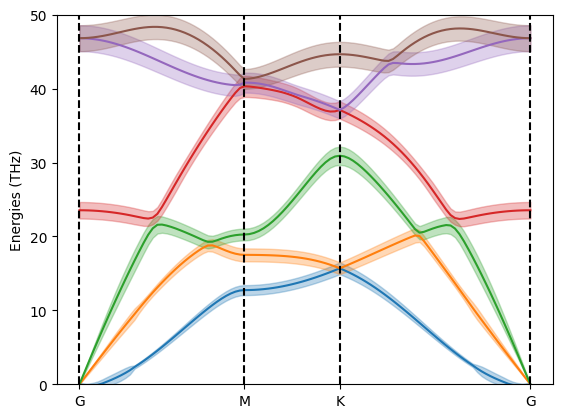

In [8]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown"]
plt.figure()

for ii, eng in enumerate(mean_energies.T):
    plt.fill_between(
        labels[0],
        eng - error_energies[:, ii],
        eng + error_energies[:, ii],
        color=colors[ii],
        alpha=0.3,
    )
    plt.plot(labels[0], eng, c=colors[ii])

for xcoord, name in zip(labels[1], labels[2]):
    plt.axvline(xcoord, c="k", ls="--")
plt.xticks(labels[1], labels[2])
plt.ylim(0, 50)
plt.ylabel("Energies (THz)")
plt.show()